## Ungraded Lab: ImageDataGenerator with a validation set

Here we will continue using the **ImageDataGenerator** class to prepare the _Horses or Humans_ dataset. Here we will add a validation set so we can also measure how well the model performs in data it hasn't seen

In [2]:
import os 

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')


Now see what the filenames look like in these directories:

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
TRAIN SET HUMANS: ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
VAL SET HORSES: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
VAL SET HUMANS: ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


We can find out the total number of horse and human images in the directories:

In [5]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now let's take a look at a few pictures to get a better  sense of what they look like. First, we configure the matplotlib parameters:

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4 

# Index for iterating over images
pic_index = 0 

Now, display a batch of 8 horse and 8 human pictures. We can rerun the cell to see a fresh batch each time: 

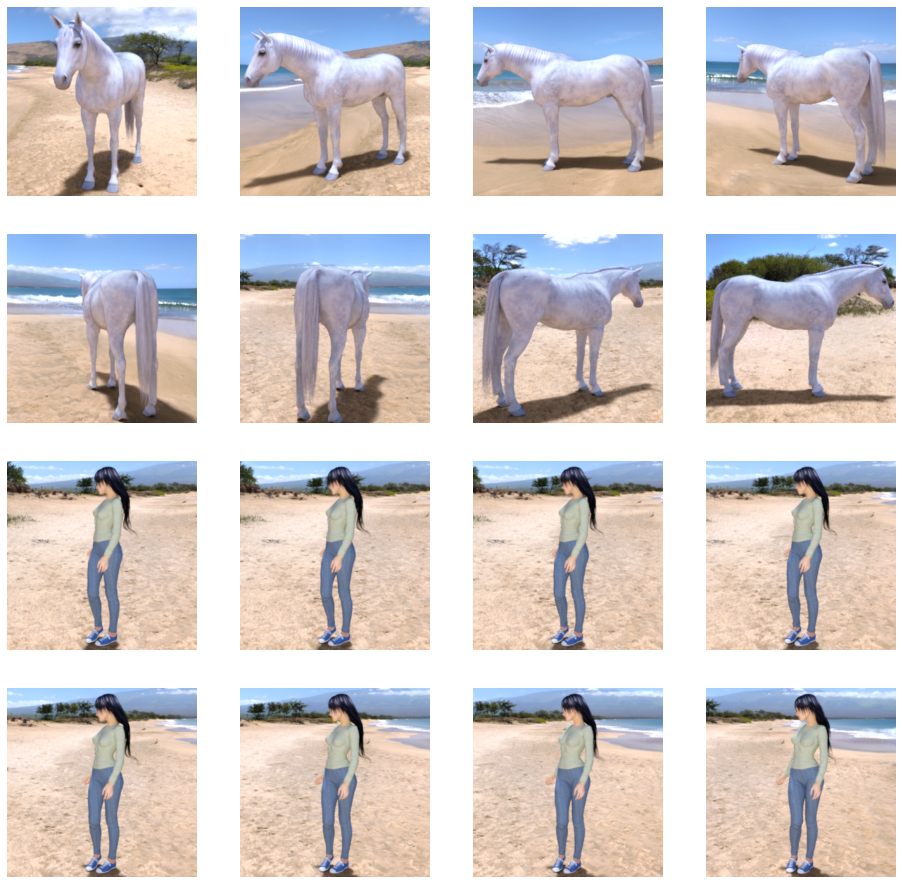

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf() 
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

#### Building a small model from scratch 

We will define the same model architecture as before: 

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([ 
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # This is the second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    # This is the third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    # This is the fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    # This is the fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron. This will containg a value from 0-1 - 0 for horses and 1 for humans
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Let's review the network architecture and output shapes with _model.summary()_

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

Using these compile settings:

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
                optimizer=RMSprop(learning_rate=0.001),
                metrics=['accuracy'])
                

#### Data Preprocessing 

Now we will setup the data generators. It will be scaled to have [0,1] range of pixel values

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    # Since we use binary_crossentropy loss, we will need binary labels
    class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human/',
    target_size = (300, 300),
    batch_size=32,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary')
    

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


#### Training

Now we can train the model for 15 epochs. Here we will pass parameters for _validation_data_ and _validation_steps_. With these we will notice additional outputs in the print statements: _val_loss_ and _val_accuracy_. Notice that as we train with more epochs, out training accuracy might go up, while our validation accuracy goes down. This can be a sign of overfitting and we need to prevent our model from reaching this point! 

In [13]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 8, 
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 50s 6s/step - loss: 0.7914 - accuracy: 0.5050 - val_loss: 0.6677 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 44s 5s/step - loss: 0.6581 - accuracy: 0.6396 - val_loss: 0.7117 - val_accuracy: 0.6055
Epoch 3/15
8/8 [==============================] - 44s 5s/step - loss: 1.2872 - accuracy: 0.7976 - val_loss: 0.6408 - val_accuracy: 0.6250
Epoch 4/15
8/8 [==============================] - 44s 5s/step - loss: 0.3847 - accuracy: 0.8521 - val_loss: 0.9970 - val_accuracy: 0.7578
Epoch 5/15
8/8 [==============================] - 44s 5s/step - loss: 0.2116 - accuracy: 0.9210 - val_loss: 1.2348 - val_accuracy: 0.7930
Epoch 6/15
8/8 [==============================] - 44s 5s/step - loss: 0.1700 - accuracy: 0.9310 - val_loss: 1.5611 - val_accuracy: 0.7812
Epoch 7/15
8/8 [==============================] - 45s 6s/step - loss: 0.1731 - accuracy: 0.9299 - val_loss: 2.0098 - val_accuracy: 0.6758
Epoch 8/15
8/8 [==================

#### Model prediction 

Now take a look at actually running a prediction using the model. This code will allow us to choose a file from our file system and run them through the model, giving an indication of whether the object is a horse or human.

In [15]:
import numpy as np 
from tensorflow.keras.utils import load_img, img_to_array 

images = os.listdir("./images")

print(images)

for i in images:
    print()
    # prediction images 
    path = "./images/" + i 
    img = load_img(path, target_size=(300,300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    if classes[0]>0.5:
        print(i + " is a human")
    else: 
        print(i + " is a horse")
    

['bb.jpg', 'me.jpg']

1/1 [==============================] - 0s 154ms/step
bb.jpg is a horse

1/1 [==============================] - 0s 34ms/step
me.jpg is a horse


#### Visualizing Intermediate Representations 

We can plot how the features are transformed as it goes through each layer!

1/1 [==============================] - 0s 90ms/step


C:\Users\Bruger\AppData\Local\Temp\ipykernel_27524\1822119833.py:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


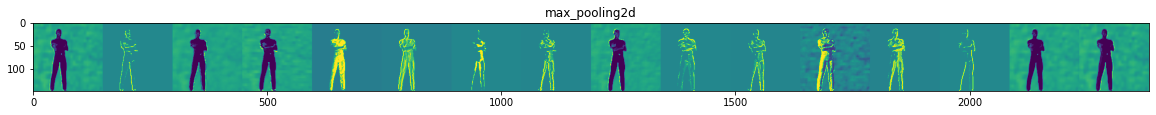

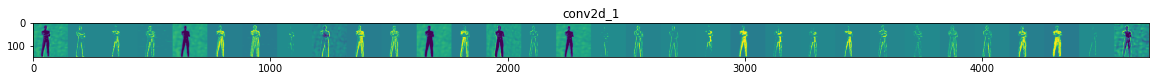

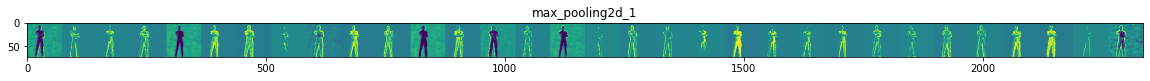

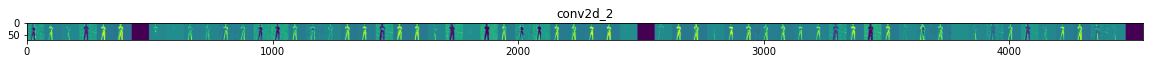

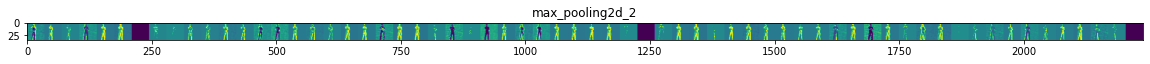

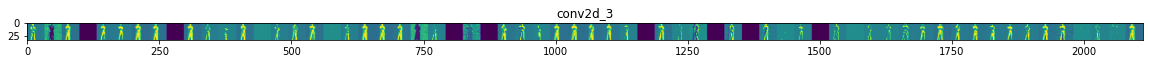

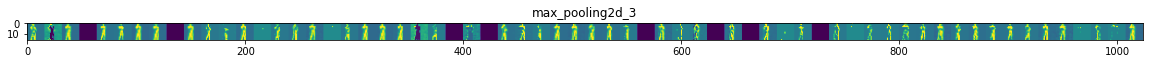

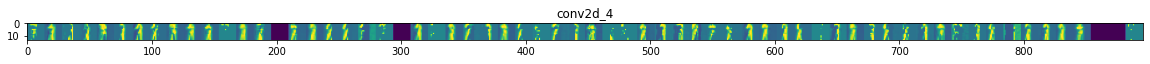

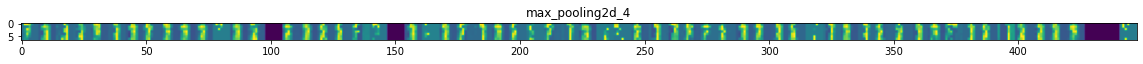

In [16]:
import random 

# Define a new model that will take an image as input and will output intermediate representations 
# for all layers in the previous model after the first

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set 
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300,300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Scale by 1/255 
x /= 255 

# Run the image through of the layers, so we can have them as part of the plot
# intermediate representations for this image
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers so we can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations 
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1] # number of features in feature_map

        # The feature map has shape (1, soze, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix 
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid 
            display_grid[:, i * size : (i + 1) * size] = x 
        
        # Display the grid 
        scale = 20. / n_features 
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    